# Introdução

O projeto é o desenvolvimento de um sistema de recomendações de leads a partir de uma base de dados pré establecida. Os leads são pessoas que demonstraram interesse em algum ramo do seu negócio, como por exemplo um conteúdo, produto ou serviço. Esses leads são importantes para o futuro da sua empresa porque podem se tornar uma oportunidade de negócio.

A partir de uma lista de clientes atuais, o sistema irá analisar esses dados e categoriza-los em grupos específicos com a técnica de clusterização. A clusterização utiliza métodos numéricos para agrupar automaticamente por aprendizado não supervisionado os dados em k grupos.

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder, StandardScaler, KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from joblib import dump, load
import pystaticplot as ps
import plotly.express as px

obj = ps.dataviz()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette(obj.colors))

import warnings
warnings.filterwarnings('ignore')

## Coleta de Dados

In [2]:
market = pd.read_csv('../estaticos_market.csv')

In [3]:
market.shape

(462298, 182)

In [4]:
null_data = pd.DataFrame(data = [list(market.columns), list(market.isnull().sum())]).transpose()
null_data.columns = ['feature', 'null']

print(f'Colunas completas: {null_data.loc[null_data.null == 0].shape[0]}')
print(f'Colunas com menos de 50% dos dados nulos: {null_data.loc[null_data.null <= 0.5 * market.shape[0]].shape[0]}')
print(f'Colunas com mais de 50% dos dados nulos: {null_data.loc[null_data.null > 0.5 * market.shape[0]].shape[0]}')

Colunas completas: 19
Colunas com menos de 50% dos dados nulos: 51
Colunas com mais de 50% dos dados nulos: 131


In [5]:
market = market.filter(items = null_data.feature.loc[null_data.null < 0.5 * market.shape[0]])

In [6]:
market.columns

Index(['Unnamed: 0', 'id', 'fl_matriz', 'de_natureza_juridica', 'sg_uf',
       'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_empresa_anos',
       'idade_emp_cat', 'fl_me', 'fl_sa', 'fl_epp', 'fl_mei', 'fl_ltda',
       'dt_situacao', 'fl_st_especial', 'fl_email', 'fl_telefone', 'fl_rm',
       'nm_divisao', 'nm_segmento', 'fl_spa', 'fl_antt', 'fl_veiculo',
       'fl_optante_simples', 'vl_total_veiculos_pesados_grupo',
       'vl_total_veiculos_leves_grupo', 'fl_optante_simei', 'sg_uf_matriz',
       'de_saude_tributaria', 'de_saude_rescencia', 'nu_meses_rescencia',
       'de_nivel_atividade', 'fl_simples_irregular',
       'empsetorcensitariofaixarendapopulacao', 'nm_meso_regiao',
       'nm_micro_regiao', 'fl_passivel_iss', 'qt_socios', 'qt_socios_pf',
       'qt_socios_pj', 'idade_media_socios', 'idade_maxima_socios',
       'idade_minima_socios', 'qt_socios_st_regular',
       'de_faixa_faturamento_estimado', 'de_faixa_faturamento_estimado_grupo',
       'vl_faturamento_

In [7]:
market.drop(columns = ['Unnamed: 0', 'fl_matriz','natureza_juridica_macro','de_ramo','fl_spa', 'fl_antt',
    'idade_empresa_anos','vl_total_veiculos_pesados_grupo','vl_total_veiculos_leves_grupo','fl_veiculo',
    'fl_me','fl_sa','fl_epp','fl_mei','fl_ltda','dt_situacao','fl_st_especial','fl_email','fl_telefone',
    'fl_rm','nm_divisao','fl_optante_simples','sg_uf_matriz','de_saude_tributaria','de_saude_rescencia',
    'nu_meses_rescencia','fl_simples_irregular','empsetorcensitariofaixarendapopulacao','nm_meso_regiao',
    'nm_micro_regiao','fl_passivel_iss','idade_media_socios','idade_maxima_socios','idade_minima_socios',
    'qt_socios_st_regular','de_faixa_faturamento_estimado','vl_faturamento_estimado_grupo_aux',
    'vl_faturamento_estimado_aux','qt_socios','qt_socios_pj','qt_socios_pf', 'qt_filiais','fl_optante_simei'], axis = 1, inplace = True)

In [8]:
market.isnull().sum()

id                                         0
de_natureza_juridica                       0
sg_uf                                      0
setor                                   1927
idade_emp_cat                              0
nm_segmento                             1927
de_nivel_atividade                     11168
de_faixa_faturamento_estimado_grupo    27513
dtype: int64

## Análise exploratória

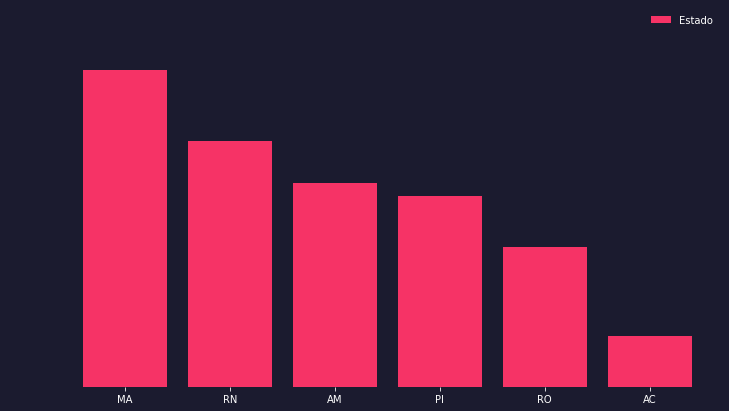

In [9]:
obj.bar_chart(labels = market.sg_uf.value_counts().index, values = [market.sg_uf.value_counts().values], legend = ['Estado'])
plt.show()

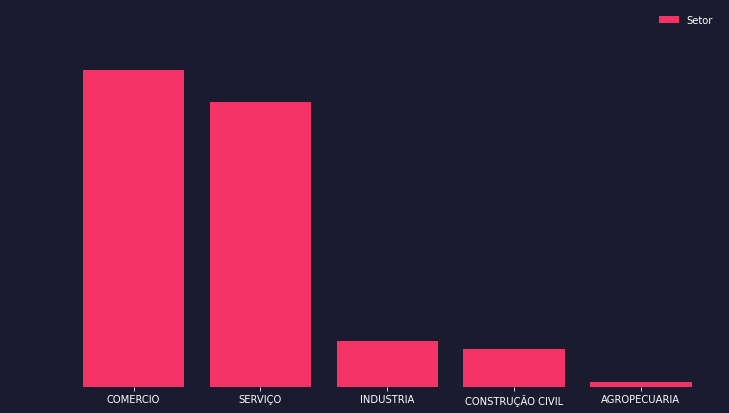

In [10]:
obj.bar_chart(labels = market.setor.value_counts().index, values = [market.setor.value_counts().values], legend = ['Setor'])
plt.show()

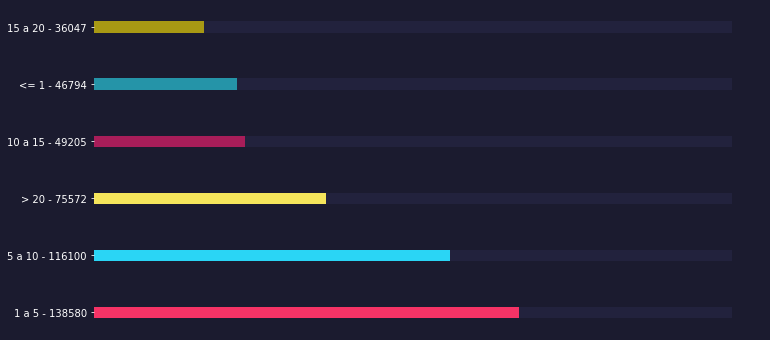

In [11]:
obj.horizontal_bar_chart(labels = market.idade_emp_cat.value_counts().index, values = market.idade_emp_cat.value_counts().values)
plt.show()

In [12]:
market.nm_segmento.value_counts()

COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS           211224
OUTRAS ATIVIDADES DE SERVICOS                                         59561
INDUSTRIAS DE TRANSFORMACAO                                           31968
ALOJAMENTO E ALIMENTACAO                                              30180
CONSTRUCAO                                                            25363
ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEMENTARES                  21326
ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS                       17371
TRANSPORTE ARMAZENAGEM E CORREIO                                      15485
EDUCACAO                                                              11311
SAUDE HUMANA E SERVICOS SOCIAIS                                       10139
ARTES CULTURA ESPORTE E RECREACAO                                      5503
INFORMACAO E COMUNICACAO                                               5475
ATIVIDADES FINANCEIRAS DE SEGUROS E SERVICOS RELACIONADOS              3287
AGRICULTURA 

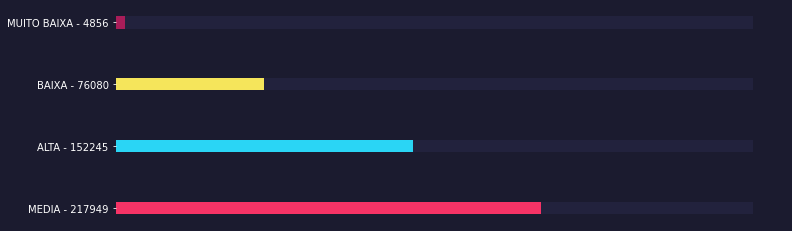

In [13]:
obj.horizontal_bar_chart(labels = market.de_nivel_atividade.value_counts().index, values = market.de_nivel_atividade.value_counts().values)
plt.show()

In [14]:
market.de_faixa_faturamento_estimado_grupo.value_counts()

DE R$ 81.000,01 A R$ 360.000,00             252602
ATE R$ 81.000,00                             98118
DE R$ 360.000,01 A R$ 1.500.000,00           53492
DE R$ 1.500.000,01 A R$ 4.800.000,00         13465
DE R$ 4.800.000,01 A R$ 10.000.000,00         4055
ACIMA DE 1 BILHAO DE REAIS                    3613
DE R$ 10.000.000,01 A R$ 30.000.000,00        3598
DE R$ 30.000.000,01 A R$ 100.000.000,00       3061
DE R$ 100.000.000,01 A R$ 300.000.000,00      1583
DE R$ 500.000.000,01 A 1 BILHAO DE REAIS       676
DE R$ 300.000.000,01 A R$ 500.000.000,00       522
Name: de_faixa_faturamento_estimado_grupo, dtype: int64

## Pré processamento de dados

In [15]:
# todos os setores que estão nulos serão classificados na nova categoria OUTROS
market.setor.fillna('OUTROS', inplace = True)

# todos os segmentos que estão nulos serão classificados na nova categoria OUTROS
market.nm_segmento.fillna('OUTROS', inplace =  True)

# para os dados que estiverem com dado nulo será inserido a categoria que mais se repete
market.de_faixa_faturamento_estimado_grupo.fillna(market.de_faixa_faturamento_estimado_grupo.mode().values[0], inplace = True)

# para os dados que estiverem com dado nulo será inserido a categoria que mais se repete, porém será realizado um group 
# by a partir do nível de ativade da empresa
faixa_faturamento_por_nivel = market.groupby(['de_faixa_faturamento_estimado_grupo'])['de_nivel_atividade'].agg(pd.Series.mode)
market.de_nivel_atividade.fillna(market.de_faixa_faturamento_estimado_grupo.map(faixa_faturamento_por_nivel), inplace = True)

In [16]:
labelencoder = LabelEncoder()

market.de_natureza_juridica = labelencoder.fit_transform(market.de_natureza_juridica)
market.sg_uf = labelencoder.fit_transform(market.sg_uf)
market.setor = labelencoder.fit_transform(market.setor)
market.nm_segmento = labelencoder.fit_transform(market.nm_segmento)
market.idade_emp_cat = labelencoder.fit_transform(market.idade_emp_cat)
market.de_nivel_atividade = labelencoder.fit_transform(market.de_nivel_atividade)
market.de_faixa_faturamento_estimado_grupo = labelencoder.fit_transform(market.de_faixa_faturamento_estimado_grupo)

In [17]:
scaler = StandardScaler()
features = market.drop(columns = ['id'])
features = scaler.fit_transform(features)

In [18]:
pca = PCA(n_components = 3)
features = pca.fit_transform(features)

print((pca.explained_variance_ratio_))
print((pca.explained_variance_ratio_).sum())

[0.18964876 0.18577644 0.15945918]
0.5348843745798737


## Modelo

In [19]:
K = range(1,16)
SoSD = []
for k in K:
    kmean = KMeans(n_clusters= k)
    kmean = kmean.fit(features)
    SoSD.append(kmean.inertia_)

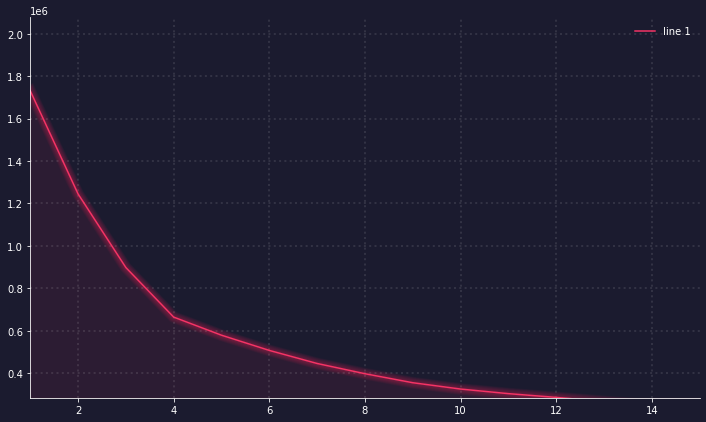

In [20]:
obj.line_chart(x = [K], y = [SoSD])
plt.show()

In [21]:
kmeans = KMeans(n_clusters= 6, init = 'k-means++')
kmeans.fit(features)
centroides = kmeans.cluster_centers_
distancia = kmeans.fit_transform(features)
labels = kmeans.labels_
labels = labels.astype(str)

In [22]:
fig = px.scatter_3d(x = features[:20000,0], y = features[:20000,2], z = features[:20000,1], 
        color = labels[:20000], color_discrete_map = {
            '0':'#F63366',
            '1':'#2AD5F5',
            '2':'#F5E55B',
            '3':'#A81D59',
            '4':'#2594A8',
            '5':'#A89914'
        })
    
# Configura os eixos para a cor branca
fig.update_xaxes(showline = True, linecolor = '#FFFFFF')
fig.update_yaxes(showline = True, linecolor = '#FFFFFF')

# Configura para legenda ficar no lado esquerdo
fig.update_layout(legend = dict(
    yanchor = 'top',
    y=0.8,
    xanchor="left",
    x=-0.05,
    font=dict(
    color="white"
    )
))

# Configura a cor do fundo para transparente
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(0,0,0,0)'
})

# Funções


In [23]:
# A função realiza a leitura do arquivo csv informado e realiza o tratamento nele, eliminando as colunas que posseum mais de 50% de dados ausentes e outros colunas que em análise exploratória não foram consideradas importantes para a regra de negócio.

def data_collection(filepath):

    # lê o dataset
    df = pd.read_csv(filepath)

    # monta um dataframe com todas as features e a porcentagem dos dados nulos
    null_data = pd.DataFrame(data = [list(df.columns), list(df.isnull().sum())]).transpose()
    null_data.columns = ['feature', 'null_data']

    # filtra o dataframe para colunas com no máximo 50% dos dados ausentes
    df = df.filter(items = null_data.feature.loc[null_data.null_data < 0.5 * df.shape[0]])

    # exclui as colunas que não serão usadas na análise
    df.drop(columns = ['Unnamed: 0', 'fl_matriz','natureza_juridica_macro','de_ramo','fl_spa', 'fl_antt',
    'idade_empresa_anos','vl_total_veiculos_pesados_grupo','vl_total_veiculos_leves_grupo','fl_veiculo',
    'fl_me','fl_sa','fl_epp','fl_mei','fl_ltda','dt_situacao','fl_st_especial','fl_email','fl_telefone',
    'fl_rm','nm_divisao','fl_optante_simples','sg_uf_matriz','de_saude_tributaria','de_saude_rescencia',
    'nu_meses_rescencia','fl_simples_irregular','empsetorcensitariofaixarendapopulacao','nm_meso_regiao',
    'nm_micro_regiao','fl_passivel_iss','idade_media_socios','idade_maxima_socios','idade_minima_socios',
    'qt_socios_st_regular','de_faixa_faturamento_estimado','vl_faturamento_estimado_grupo_aux',
    'vl_faturamento_estimado_aux','qt_socios','qt_socios_pj','qt_socios_pf', 'qt_filiais','fl_optante_simei'], axis = 1, inplace = True)

    return df

In [24]:
# A função realiza o pré processamento do dataframe já filtrado com as colunas de interesse, inicialmente ele trata os dados ausentes para as situações de setor, segmento, faixa de faturamento e nível de atividade. Após essa tratativa realiza a transformação de variváveis categóricas em discretas e por fim a padronização dos dados pra mesma escala. Com o intuito de reduzir as variáveis foi decidido usar o PCA para reduzir para 3, explicando aproximadamente 60%

def data_preprocessing(df):

    # realiza o filtro para selecionar somente as features que serão utilizadas no modelo
    df = df.filter(items = ['id','de_natureza_juridica','sg_uf', 'setor', 'nm_segmento', 'idade_emp_cat','de_nivel_atividade',
    'de_faixa_faturamento_estimado_grupo'])

    # todos os setores que estão nulos serão classificados na nova categoria OUTROS
    df.setor.fillna('OUTROS', inplace = True)

    # todos os segmentos que estão nulos serão classificados na nova categoria OUTROS
    df.nm_segmento.fillna('OUTROS', inplace =  True)

    # para os dados que estiverem com dado nulo será inserido a categoria que mais se repete
    df.de_faixa_faturamento_estimado_grupo.fillna(df.de_faixa_faturamento_estimado_grupo.mode().values[0], inplace = True)

    # para os dados que estiverem com dado nulo será inserido a categoria que mais se repete, porém será realizado um group 
    # by a partir do nível de ativade da empresa
    faixa_faturamento_por_nivel = df.groupby(['de_faixa_faturamento_estimado_grupo'])['de_nivel_atividade'].agg(pd.Series.mode)
    df.de_nivel_atividade.fillna(df.de_faixa_faturamento_estimado_grupo.map(faixa_faturamento_por_nivel), inplace = True)

    df_return = df.copy()

    # transforma as variáveis categóricas em variáveis discretas
    labelencoder = LabelEncoder()
    df.de_natureza_juridica = labelencoder.fit_transform(df.de_natureza_juridica)
    df.sg_uf = labelencoder.fit_transform(df.sg_uf)
    df.setor = labelencoder.fit_transform(df.setor)
    df.nm_segmento = labelencoder.fit_transform(df.nm_segmento)
    df.idade_emp_cat = labelencoder.fit_transform(df.idade_emp_cat)
    df.de_nivel_atividade = labelencoder.fit_transform(df.de_nivel_atividade)
    df.de_faixa_faturamento_estimado_grupo = labelencoder.fit_transform(df.de_faixa_faturamento_estimado_grupo)

    # cria a classe para padronizar o dataset
    scaler = StandardScaler()

    # separa os id's
    ids = df.id

    # separa as features
    features = df.filter(items = ['de_natureza_juridica','sg_uf', 'setor', 'nm_segmento', 'idade_emp_cat','de_nivel_atividade',
    'de_faixa_faturamento_estimado_grupo'])

    # padroniza os dados
    features = scaler.fit_transform(features)

    # redução de dimensionalidade utilizando método PCA - Análise das Componentes Principais para 3 dimensões
    pca = PCA(n_components= 3)
    features = pca.fit_transform(features)

    return df_return, ids, features

In [75]:
# Realiza o treinamento do modelo usando o Algoritmo Kmeans com 6 clusters. Para definir o número de clusters foi utilizado o elbow method. Após treinamento o modelo é salvo em uma extensão pkl

def model(features):

    # gera o modelo de KMeans
    kmeans = KMeans(n_clusters= 6, init = 'k-means++')

    # treina o modelo
    kmeans.fit(features)

    # pega os valores dos centróides
    centroides = kmeans.cluster_centers_

    # pega as distancias para o centróides
    distancia = kmeans.fit_transform(features)

    # pega o agrupamento de cada id
    labels = kmeans.labels_

    # salva o modelo
    dump(kmeans, 'model.pkl')
    
    return kmeans

In [26]:
# Função destinada para salvar a base de dados após o treinamento e clusterização

def save_data(df, kmeans):

    # salva o dataset pre processado
    df['label'] = kmeans.labels_
    df.to_csv('data/market_preprocessing.csv', index = False, encoding = 'utf-8')

In [27]:
# Função para carregar o modelo e utiliza-lo no código

def load_model(filepath):

    # carrega modelo
    model = load(filepath)

    return model

In [28]:
#  Função para realizar previsão de um clustering para determinados features

def predict(kmeans, features):

    # realiza a previsão com base no modelo
    output = kmeans.predict(features)

    return list(output)

In [29]:
# Função para carregar um portfólio somente com as colunas de interesse

def get_portfolio(filepath, market):

    # lê o portfolio e o banco de informações com as labels 
    portfolio = pd.read_csv(filepath)
    market_label = pd.read_csv(market)
    portfolio = portfolio.id

    # verifica quais as labels dos ids que estão no portfolio
    df = market_label[market_label['id'].isin(portfolio)]  

    return df

# Etapas do processo

In [49]:
# Realiza a leitura da base de dados de cliente
df = data_collection('../estaticos_market.csv')

In [50]:
df.head()

,id,de_natureza_juridica,sg_uf,setor,idade_emp_cat,nm_segmento,de_nivel_atividade,de_faixa_faturamento_estimado_grupo
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,SOCIEDADE EMPRESARIA LIMITADA,RN,CONSTRUÇÃO CIVIL,10 a 15,CONSTRUCAO,ALTA,"DE R$ 1.500.000,01 A R$ 4.800.000,00"
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,EMPRESARIO INDIVIDUAL,PI,SERVIÇO,1 a 5,ALOJAMENTO E ALIMENTACAO,BAIXA,"DE R$ 81.000,01 A R$ 360.000,00"
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,EMPRESARIO INDIVIDUAL,AM,SERVIÇO,5 a 10,TRANSPORTE ARMAZENAGEM E CORREIO,MEDIA,"ATE R$ 81.000,00"
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,EMPRESARIO INDIVIDUAL,AM,SERVIÇO,5 a 10,OUTRAS ATIVIDADES DE SERVICOS,MEDIA,"DE R$ 81.000,01 A R$ 360.000,00"
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,EMPRESARIO INDIVIDUAL,RN,SERVIÇO,1 a 5,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,ALTA,"DE R$ 81.000,01 A R$ 360.000,00"


In [51]:
# Realiza o pré processamento do dataframe, retornando um dataframe tratato, a lista de ids e as feautres pare treinamento do modelo
df, ids, features = data_preprocessing(df)

In [52]:
df.head()

,id,de_natureza_juridica,sg_uf,setor,nm_segmento,idade_emp_cat,de_nivel_atividade,de_faixa_faturamento_estimado_grupo
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,SOCIEDADE EMPRESARIA LIMITADA,RN,CONSTRUÇÃO CIVIL,CONSTRUCAO,10 a 15,ALTA,"DE R$ 1.500.000,01 A R$ 4.800.000,00"
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,EMPRESARIO INDIVIDUAL,PI,SERVIÇO,ALOJAMENTO E ALIMENTACAO,1 a 5,BAIXA,"DE R$ 81.000,01 A R$ 360.000,00"
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,EMPRESARIO INDIVIDUAL,AM,SERVIÇO,TRANSPORTE ARMAZENAGEM E CORREIO,5 a 10,MEDIA,"ATE R$ 81.000,00"
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,EMPRESARIO INDIVIDUAL,AM,SERVIÇO,OUTRAS ATIVIDADES DE SERVICOS,5 a 10,MEDIA,"DE R$ 81.000,01 A R$ 360.000,00"
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,EMPRESARIO INDIVIDUAL,RN,SERVIÇO,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,1 a 5,ALTA,"DE R$ 81.000,01 A R$ 360.000,00"


In [73]:
features

array([[ 1.68947344,  0.80900402,  1.91533384],
       [ 0.37345542,  0.42263575, -0.14431578],
       [-2.01234179,  1.56140272, -0.21710243],
       ...,
       [-2.99492117, -0.2697872 , -0.69827926],
       [ 1.8391228 ,  0.2084492 ,  1.73378959],
       [-2.60201706,  0.27272993,  0.83134327]])

In [76]:
# realiza o treinamento do modelo a partir das features da base de dados do cliente
model = model(features)

In [71]:
# Salva o modelo
save_data(df, kmeans)

In [110]:
output = predict(kmeans, [[-1, 1, -1]])
output

[4]

In [111]:
model = load_model('model.pkl')
output1 = predict(model, [[-1, 1, -1]])
output1

[4]